In [1]:
%autoreload 2

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


semantic_path = Path("/data/vision/polina/scratch/clintonw/datasets/kubric/klevr/0/segmentation_0000.png")

UsageError: Line magic function `%autoreload` not found.


In [23]:
# a dict of integer to color
class_to_color = {
    0: (0, 0, 0),
    1: (255, 0, 0),
    2: (0, 255, 0),
    3: (0, 0, 255),
    4: (255, 255, 0),
    5: (255, 0, 255),
    6: (0, 255, 255),
    7: (255, 255, 255),
    8: (128, 0, 0),
    9: (0, 128, 0),
    10: (0, 0, 128),
}
# map as array
int_to_color = np.array([class_to_color[i] for i in range(len(class_to_color))])

# inverse mapping
color_to_class = {v: k for k, v in class_to_color.items()}

def show_semantic_map(semantic_map):
    if len(semantic_map.shape) == 3:
        semantic_map = semantic_map.squeeze(-1)
    rgb_array = int_to_color[semantic_map]
    
    plt.imshow(rgb_array)
    plt.show()

In [21]:
from PIL import Image
image = Image.open(semantic_path)
image.show()
semantic_map = np.array(image)

xv: Can't open display


In [7]:
semantic_map

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

[0 1 2 3 4 5]


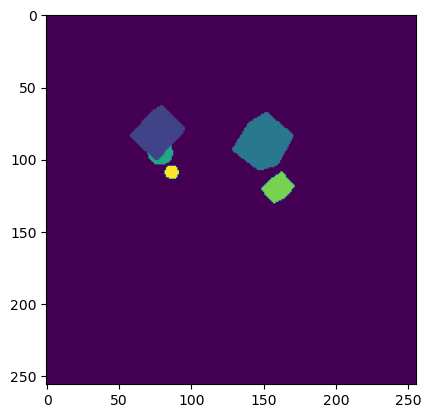

In [10]:
plt.imshow(semantic_map)
print(np.unique(semantic_map))

In [28]:
from nerfstudio.data.utils.data_utils import get_semantics_and_mask_tensors_from_path
import torch

input_mask = torch.zeros(256,256) + 3
sem, mask = get_semantics_and_mask_tensors_from_path(semantic_path, mask_indices=[])

show_semantic_map(sem)


TypeError: tensor(): argument 'dtype' must be torch.dtype, not str

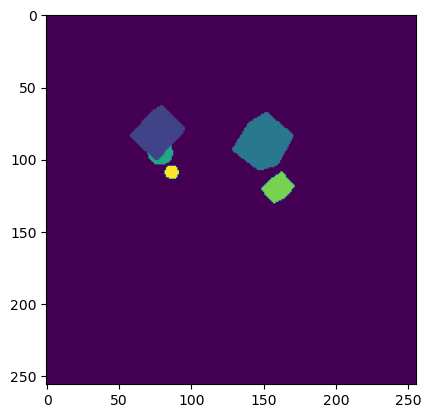

In [17]:
plt.imshow(sem)